# 2. Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

# 2.2 Data preparation

In [4]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [5]:
!wget $data

--2023-09-10 12:35:37--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8001::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1,4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1,41M  6,11MB/s    in 0,2s    

2023-09-10 12:35:38 (6,11 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [8]:
df = pd.read_csv('data.csv')

In [9]:
# just to get an overview about the dataset
# what you can see here, there is some inconsitency in the way of naming columns
# -> sometimes the columns have underscores, sometimes not, capital letters, sometimes not
# df['Transmission Type']     is working 
# df.Transmission Type        is not working because of space
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
# first task is cleaning to make it consistent (e.g. make it lowercase everywhere and replace spaces with underscores)
# Pandas DataFrame has a field called columns, that contains the name of the columns
# columns is an index, that is a special data structure in Pandas (very similar to series)
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [13]:
# like series it also has the str method for doing string manipulation
# what we can do now is to apply the same string function to all column names
# (make it lowercase everywhere and replace spaces with underscores)
# write the result back to the columns field
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [18]:
# Actually we have the same problems with the values
# Before we can apply that, we need to detect all string columns, because the str function works only on strings
# dtypes returns for all the columns what is the type of this column and here we're interested in "objects"
# in case of csv files "objects" cannot be something different than strings
df.dtypes
df.dtypes == 'object'

# to select only the objects
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [23]:
# result are this series, 
#      where object are the values 
#      and [make, model, engine_fuel_type, ...] is the index of the series
# we're not interested in values here, but we're interested in this names
# 
# to get access to the index of that series and convert it to a python list with name strings
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [24]:
# this is what we want to do with all columns of the strings list
df['make'].str.lower().str.replace(' ','_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [25]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# 2.3 Exploratory data analysis (EDA) 

In [29]:
# We want to understand how the data looks like
# just to get a feeling what values are there
# to learn more about the problem

# What we can do now is to take a look at each column
# and try to understand what kind of data we have there

# Print some statistics for each column...
for col in df.columns:
    print(col)
    print(df[col].head())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [32]:
# ...but this is not very informative...
# what about unique values?
for col in df.columns:
    print(col)
    # print only the first 5 values
    # print(df[col].unique()[:5])
    print(df[col].unique())
    print("number of unique values: ",df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']
number of unique values:  48

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-class

## Distribution of price 

In [34]:
# Next we want to look at the price column and visualize it
# For plotting we use two libraries

import matplotlib.pyplot as plt
import seaborn as sns

# this line is needed to display the plots in notebooks
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

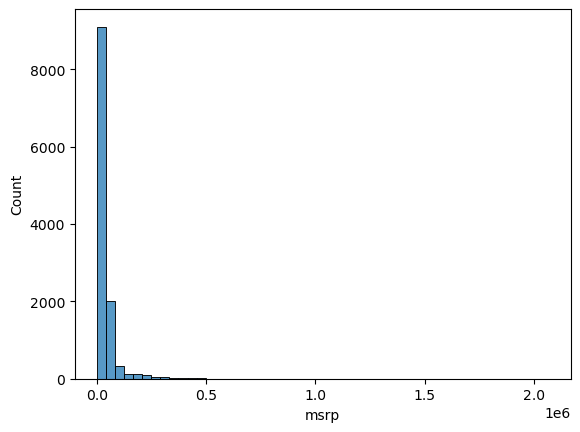

In [36]:
# this histogram show the shape of data
# bins means the number of bars in the histogram
#
# in the diagram 1e6 means 10^6 = 1,000,000
sns.histplot(df.msrp, bins=50)

# What we see is, there are a lot of prices
# that are pretty cheap and there are very few
# cars that are super expensive
#
# Long tail distribution means there are only a few cars
# in a wide range of price

<Axes: xlabel='msrp', ylabel='Count'>

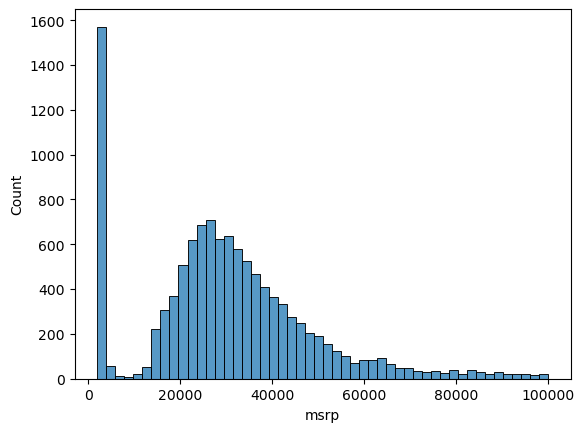

In [37]:
# We need to zoom in a bit to "ignore" the long tail with too less data
# by decreasing the car price
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

# There is a strange peak on the left side
# this could be the minimum price of $1,000 of the platform

In [40]:
# This kind of distribution (long tail, and the peak) is not good for the ml model
# --> this will confuse the model
# we need to get rid of this long tail
# To do this, we apply the logarithmic distribution, so we apply the logarithm to 
# the price and we get more compact values
#np.log([0, 1,10,1000,100000])
# problem with logarithm is when we have a 0, because log(0) does not exist
#np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])
# 
# to not always add 1 there is a numpy function
np.log1p([0, 1,10,1000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [42]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

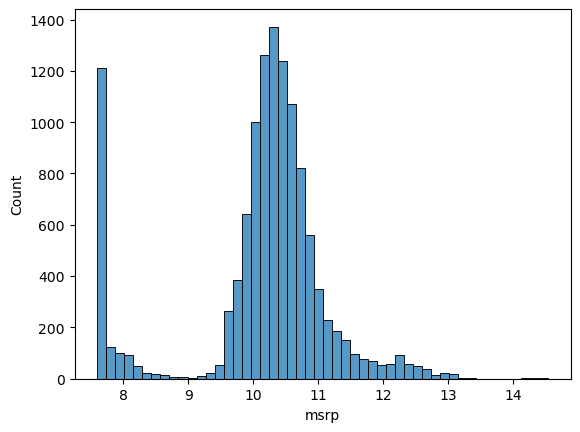

In [43]:
sns.histplot(price_logs, bins=50)

In [44]:
# We can see the long tail is gone and we see a nice bell curve shape
# the so called normal distribution, what is ideal for models
# 
# To sum up this important part: Applying the logarithm to the price
# removes the effect of long tail
#
# but still there is the strange peak

## Missing values

In [46]:
# Here we're looking for NaN values
# The sum function sum across columns and show for each
# column how much missing values are there
#
# This information is important when training a model !
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Setting up the validation framework

In [47]:
# returns the number of records
len(df)

11914

In [48]:
# calculate 20%
int(len(df) * 0.2)

2382

In [53]:
n = len(df)

n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test

n , n_val+n_test+n_train

(11914, 11914)

In [54]:
# sizes of our dataframes
n_val, n_test, n_train

(2382, 2382, 7150)

In [60]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [61]:
# This approach brings us to the problem that it's sequential. 
# That's a problem when there is an order in the dataset.
# That means we need to shuffle, otherwise there are BMWs only in one dataset.
# Shuffling is always a good idea

In [64]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [83]:
# to make it reproducible
#np.random.seed(2)
np.random.shuffle(idx)
idx

array([11545,  7488,   263, ...,  3119,  1696,  9053])

In [73]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [74]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8181,dodge,ram_pickup_1500,2009,flex-fuel_(unleaded/e85),310.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,18,13,1851,32945
4844,subaru,forester,2016,regular_unleaded,170.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,32,24,640,23395
8040,gmc,rally_wagon,1995,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,passenger_van,15,13,549,2000
6138,volkswagen,jetta,2016,regular_unleaded,150.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,39,28,873,20095
8299,land_rover,range_rover,2014,flex-fuel_(premium_unleaded_required/e85),510.0,8.0,automatic,four_wheel_drive,4.0,"flex_fuel,luxury,high-performance",large,4dr_suv,19,13,258,105300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392,toyota,rav4,2016,regular_unleaded,176.0,4.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,31,24,2031,31510
1725,mazda,b-series_truck,2007,regular_unleaded,143.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,regular_cab_pickup,26,21,586,15535
5592,lexus,gs_460,2011,premium_unleaded_(required),342.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,high-performance",midsize,sedan,24,17,454,55370
8568,nissan,rogue_select,2014,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,28,23,2009,20150


In [77]:
# Now there is no order in the index --> we can reset index and drop the old index column
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [78]:
# do the log1p transformation
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [81]:
# remove msrp values from dataframes to make sure that we don't accidentally use it for training purposes
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [82]:
len(y_train)

7150

# 2.5 Linear regression

~ is used for regression problems. The output of the model is a number.
- to recap:   g(X) ~ y
- with g as the model (in our example LINEAR REGRESSION)
- X as feature matrix
- y as the target (in our example PRICE)

Now lets look at only one observation:   g(xi) ~ yi
- xi is one car and yi is its price
- xi is one row of the feature matrix X --> we can think of it as a vector with multiple elements (n different characteristics of this specific car)

xi = (xi2,xi2, ... , xin)

g(xi2,xi2, ... , xin) ~ yi

In [84]:
df_train.iloc[10]

make                         chevrolet
model                            sonic
year                              2017
engine_fuel_type      regular_unleaded
engine_hp                        138.0
engine_cylinders                   4.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                   compact
vehicle_style                    sedan
highway_mpg                         34
city_mpg                            24
popularity                        1385
Name: 10, dtype: object

In [86]:
xi = [138, 24, 1385]

In [88]:
# in code this would look like --> this is what we want to implement

def g(xi):
    # do something and return the predicted price
    return 10000

In [89]:
g(xi)

10000

In [123]:
xi = [138, 24, 1385]
w0 = 0
w = [1, 1, 1]

In [124]:
# in code this would look like --> this is what we want to implement
# because of python language, the sum iterates not from 1 to 3 but from 0 to 2

def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [125]:
linear_regression(xi)

1547

In [126]:
# try some other values
w0 = 7.17
w = [0.01, 0.04, 0.002]
linear_regression(xi)

12.280000000000001

In [95]:
# get the real prediction for the price in $
# we do "-1" to undo the "+1" inside the log
np.exp(12.280000000000001) - 1

215344.7166272456

In [96]:
# shortcut to not do -1 manually
np.expm1(12.280000000000001) 

215344.7166272456

In [97]:
np.log1p(215344.7166272456)

12.280000000000001

# 2.6 Linear regression vector form

This covers the generalization of what we did in the last article to a vector form. That means coming back from only one observation to the whole feature matrix (xi -> X)

g(xi) = w0 + SUM(j=1 .. n)wj*xij

Looking at the last part of this formula we see the dot-product (vector vector multiplication).

g(xi) = w0 + (x_T)i*w

In [131]:
# implementing again the vector-vector multiplication
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
        
    return res

In [118]:
def linear_regression(xi):
    return w0 + dot(xi, w) 

To make it more simple, we can imagine there is one more feature xi0, that is always equal to 1.

g(xi) = w0*xi0 + (x_T)i*w
g(xi) = w0 + (x_T)i*w

That means vector w becomes a n+1 dimensional vector

w = [w0, w1, w2, ... wn]

xi = [xi0, xi1, xi2, ..., xin] = [1, xi1, xi2, ..., xin]

w_Txi = (x_T)iw = w0 + ...

That means we can use the dot product for the entire regression.


In [132]:
# adding w0 to the vector w
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [133]:
xi

[138, 24, 1385]

In [134]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [135]:
linear_regression(xi)

12.280000000000001

In [142]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [384]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

# X becomes a list of lists
X = [x1, x2, x10]
X
# this turns the list of lists into a matrix
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [144]:
# now we have predictions, so for each car we have a price for this car
y = X.dot(w_new)

# shortcut to not do -1 manually to get the real $ price
np.expm1(y) 

array([237992.82334859, 768348.51018973, 222347.22211011])

In [145]:
def linear_regression(X):
    return X.dot(w_new)

In [146]:
y = linear_regression(X)
np.expm1(y) 

array([237992.82334859, 768348.51018973, 222347.22211011])

Maybe you wonder where the w_new vector comes from. That's the topic of the next lesson.

# 2.7 Training a linear regression model

In [147]:
def train_linear_regression(X, y):
    pass

In [149]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   83],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [387]:
# adding the bias term
#ones = np.ones(9)
# X.shape[0] looks at the number of rows and creates the vector of ones
ones = np.ones(X.shape[0])
ones

array([1., 1., 1.])

In [163]:
# this function stacks vectors together
np.column_stack([ones, ones])

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [388]:
X = np.column_stack([ones, X])
# list(np.column_stack([ones, X]))
X

array([[1.000e+00, 1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01]])

In [177]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [178]:
# GRAM MATRIX
XTX = X.T.dot(X)

In [179]:
# inverse GRAM MATRIX
XTX_inv = np.linalg.inv(XTX)

In [180]:
# without round(1) it's not exactly identity matrix but the other values are very close to 0
# --> we can treat them as 0 and take it as identity matrix
XTX.dot(XTX_inv)

array([[ 1.00000000e+00,  2.60208521e-18,  4.85722573e-17,
         1.08420217e-18],
       [ 4.54747351e-13,  1.00000000e+00,  1.50990331e-14,
         2.22044605e-16],
       [ 5.68434189e-14,  1.11022302e-16,  1.00000000e+00,
         3.46944695e-17],
       [ 9.09494702e-13,  0.00000000e+00, -2.13162821e-14,
         1.00000000e+00]])

In [181]:
# gives us the I matrix
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0., -0.,  1.]])

In [182]:
# w_full contains all the weights
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 3.00092529e+04, -2.27839691e+01, -2.57690874e+02, -2.30322797e+00])

In [183]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(30009.25292276666, array([ -22.78396914, -257.69087426,   -2.30322797]))

In [222]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [186]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]

X = np.array(X)
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [187]:
train_linear_regression(X, y)

(30009.25292276666, array([ -22.78396914, -257.69087426,   -2.30322797]))

# 2.8 Car price baseline model

In [189]:
# we want to extract all the numerical columns
# we choose engine_hp, engine_cylinders, highway_mpg, city_mpg, and popularity
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [190]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [191]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,310.0,8.0,18,13,1851
1,170.0,4.0,32,24,640
2,165.0,6.0,15,13,549
3,150.0,4.0,39,28,873
4,510.0,8.0,19,13,258
...,...,...,...,...,...
7145,176.0,4.0,31,24,2031
7146,143.0,4.0,26,21,586
7147,342.0,8.0,24,17,454
7148,170.0,4.0,28,23,2009


In [390]:
# we need to extract the values 
X_train = df_train[base].values
X_train

array([[ 310.,    8.,   18.,   13., 1851.],
       [ 170.,    4.,   32.,   24.,  640.],
       [ 165.,    6.,   15.,   13.,  549.],
       ...,
       [ 342.,    8.,   24.,   17.,  454.],
       [ 170.,    4.,   28.,   23., 2009.],
       [ 160.,    6.,   19.,   14.,  586.]])

In [391]:
# missing values are not good for our model
df_train[base].isnull().sum()

engine_hp           42
engine_cylinders    17
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [392]:
# the easiest thing we can do is fill them with zero
# filling it with 0 makes the model ignores this feature, because
#
#           g(xi) = w0 + xi1w1 + xi2w2
#                        if xi1 = 0
#    -->    g(xi) = w0 + 0 + xi2w2
#
# but 0 is not always the best way to deal with missing values, because that means a car with 0 cylinders 
# or 0 horse powers
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [393]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 310.,    8.,   18.,   13., 1851.],
       [ 170.,    4.,   32.,   24.,  640.],
       [ 165.,    6.,   15.,   13.,  549.],
       ...,
       [ 342.,    8.,   24.,   17.,  454.],
       [ 170.,    4.,   28.,   23., 2009.],
       [ 160.,    6.,   19.,   14.,  586.]])

In [394]:
y_train

array([10.40262514, 10.06032035,  7.60140233, ..., 10.92181127,
        9.91100919,  8.10892416])

In [395]:
# we want to train a model
w0, w = train_linear_regression(X_train, y_train)
w0, w

(7.471835414587793,
 array([ 9.30959186e-03, -1.19533938e-01,  4.68925224e-02, -1.13441722e-02,
        -1.01631104e-05]))

In [396]:
# apply the model to the training dataset
y_pred = w0 + X_train.dot(w)
y_pred

array([10.07931663,  9.79812647,  8.84104849, ..., 10.62739988,
        9.60798726,  8.97035041])

<Axes: ylabel='Count'>

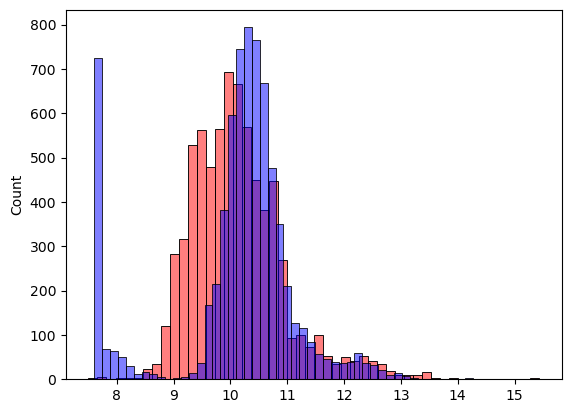

In [398]:
# now we can plot the predicted values y_pred and check if they are similar to the target variable
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# we see from this plot that the model is not ideal
# but it's better to have an objective way of saying that the model is good or not good
# and when we start improving the model, we want to ensure that we improve it
# --> next module is about RMSE to objectively evaluate the performance of regression models

# 2.9 RMSE

In [234]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [235]:
rmse(y_train, y_pred)

0.7464137917148924

# 2.10 Validating the model

In [236]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [237]:
# idea here: same way of preparing the dataset regardless of whether it's train, validation or test
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [238]:
# training part where we only use training dataset
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation part where we prepare the validation dataset the same way like before
# then we apply the model and the we compute the rmse
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7328022115111966

# 2.11 Simple feature engineering 

In [239]:
2017 - df_train.year

0        8
1        1
2       22
3        1
4        3
        ..
7145     1
7146    10
7147     6
7148     3
7149    19
Name: year, Length: 7150, dtype: int64

In [248]:
def prepare_X(df):
    # this is good way to do, otherwise while using df you'll modify the original data
    # what is mostly not wanted
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [249]:
X_train = prepare_X(df_train)
X_train

array([[3.100e+02, 8.000e+00, 1.800e+01, 1.300e+01, 1.851e+03, 8.000e+00],
       [1.700e+02, 4.000e+00, 3.200e+01, 2.400e+01, 6.400e+02, 1.000e+00],
       [1.650e+02, 6.000e+00, 1.500e+01, 1.300e+01, 5.490e+02, 2.200e+01],
       ...,
       [3.420e+02, 8.000e+00, 2.400e+01, 1.700e+01, 4.540e+02, 6.000e+00],
       [1.700e+02, 4.000e+00, 2.800e+01, 2.300e+01, 2.009e+03, 3.000e+00],
       [1.600e+02, 6.000e+00, 1.900e+01, 1.400e+01, 5.860e+02, 1.900e+01]])

In [251]:
#del df_train['age']
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [253]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [257]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation part where we prepare the validation dataset the same way like before
# then we apply the model and the we compute the rmse
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5153662333982238

<Axes: ylabel='Count'>

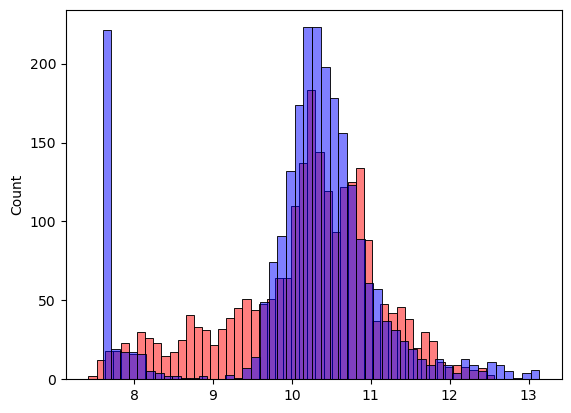

In [258]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

# 2.12 Categorical variables

In [260]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [263]:
df_train.number_of_doors

0       4.0
1       4.0
2       3.0
3       4.0
4       4.0
       ... 
7145    4.0
7146    2.0
7147    4.0
7148    4.0
7149    2.0
Name: number_of_doors, Length: 7150, dtype: float64

In [264]:
df_train.number_of_doors == 2

0       False
1       False
2       False
3       False
4       False
        ...  
7145    False
7146     True
7147    False
7148    False
7149     True
Name: number_of_doors, Length: 7150, dtype: bool

In [265]:
# turning the boolean into integers (1 and 0)
# creating a new variable for each number of doors
df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype('int')
df_train['num_doors_3'] = (df_train.number_of_doors == 3).astype('int')
df_train['num_doors_4'] = (df_train.number_of_doors == 4).astype('int')

0       0
1       0
2       0
3       0
4       0
       ..
7145    0
7146    1
7147    0
7148    0
7149    1
Name: number_of_doors, Length: 7150, dtype: int64

In [266]:
# string replacement
'num_doors_%s' % 4

'num_doors_4'

In [267]:
# with that replacement we can write a loop
for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

df_train

In [ ]:
# we delete this because we don't need it here
for v in [2, 3, 4]:
    del df_train['num_doors_%s' % v]

df_train

In [270]:
def prepare_X(df):
    # this is good way to do, otherwise while using df you'll modify the original data
    # what is mostly not wanted
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [271]:
# We see it adds one new column for each number of doors
prepare_X(df_train)

array([[310.,   8.,  18., ...,   0.,   0.,   1.],
       [170.,   4.,  32., ...,   0.,   0.,   1.],
       [165.,   6.,  15., ...,   0.,   1.,   0.],
       ...,
       [342.,   8.,  24., ...,   0.,   0.,   1.],
       [170.,   4.,  28., ...,   0.,   0.,   1.],
       [160.,   6.,  19., ...,   1.,   0.,   0.]])

In [272]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation part where we prepare the validation dataset the same way like before
# then we apply the model and the we compute the rmse
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5139733981046036

In [273]:
# We see in contrast to the last training with rmse of 0.5153662333982238 there is only a slightly improvement, 
# almost negligible so the number of doors feature is not that useful

# but maybe 'Make' is more useful
df.make
#df.make.nunique() # 48

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [275]:
# we can look at the most popular ones
#df.make.value_counts()
df.make.value_counts().head()
# first column = index
# second column = values

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [278]:
# If we want to get the actual values, we use the index property
df.make.value_counts().head().index
# wrap it in a usual Python list
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [279]:
def prepare_X(df):
    # this is good way to do, otherwise while using df you'll modify the original data
    # what is mostly not wanted
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
        
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [280]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation part where we prepare the validation dataset the same way like before
# then we apply the model and the we compute the rmse
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5058837299788781

In [283]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [284]:
# The dictionary category will contain for each of the categories the top 5 most common ones
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)
    
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [286]:
# We need two loops here, one is for each key of the dictionary categories
# and then for each value inside we create a new column

def prepare_X(df):
    # this is good way to do, otherwise while using df you'll modify the original data
    # what is mostly not wanted
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c, values in categories.items():    
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [287]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validation part where we prepare the validation dataset the same way like before
# then we apply the model and the we compute the rmse
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

292.5054633101075

In [291]:
# the rmse (292.505) is very large, so something went wrong
# in the next lesson we will see why that happened and hot to fix it
w

array([ 5.10827181e-02, -8.41634285e+01,  3.26491698e+00, -3.83378825e+01,
       -8.52999724e-03, -6.61563027e+00,  9.01103598e+03,  8.95258798e+03,
        9.00108193e+03, -4.80091213e+01, -7.90563542e+00, -4.47826854e+01,
        5.27947659e+01, -3.18004466e+01,  7.22491613e+02,  6.96699538e+02,
        6.63958567e+02,  6.89453297e+02,  8.61833761e+02, -2.84683401e+16,
       -2.84683401e+16, -2.84683401e+16, -2.84683401e+16, -2.84683401e+16,
        1.82462121e+15,  1.82462121e+15,  1.82462121e+15,  1.82462121e+15,
       -3.49596886e+01,  4.09844187e+00,  1.61682488e-01, -3.59689647e+00,
       -2.76289272e+01, -7.80366505e+01, -7.68279178e+01, -6.56764304e+01,
        4.61801898e-02,  5.59601422e-02,  2.50837949e-01,  3.70578562e-01,
       -1.26707090e-01])

# 2.13 Regularization

In [292]:
# You see here 2nd and 3rd columns are identical
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5]
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [295]:
# You see the 2nd and 3rd columns are the same
# In this case the inverse doesn't exist
# Remember: In linear algebra we say that one column is a linear combination of other columns,
# which means that it's possible to express the column number 3 with other columns of the matrix
# which is basically just a duplicate of column 2

XTX = X.T.dot(X)

In [296]:
# This raises an error that this matrix is a singular matrix
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [321]:
# Same X as before but this time, there is some noise
# Strange observation in my case I need 5.0000001 instead of 5.00000001 in the video
# Alexeys value raises the same "Singular matrix" error

X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]

X = np.array(X)
X
y = [1, 2, 3, 1, 2, 3]

In [317]:
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [320]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.93617174e-02, -1.76703046e+05,  1.76703004e+05],
       [-1.76703046e+05,  4.02107113e+13, -4.02107110e+13],
       [ 1.76703004e+05, -4.02107110e+13,  4.02107106e+13]])

In [324]:
w = XTX_inv.dot(X.T).dot(y)
w

array([ 2.85838502e-01, -5.04106388e+06,  5.04106425e+06])

In [329]:
# Let's demonstrate this on an easier example of XTX
#XTX = [
#    [1, 2, 2],
#    [2, 1, 1],
#    [2, 1, 1]
#]
#XTX = np.array(XTX)
#np.linalg.inv(XTX)

# that raises the "singular matrix" error
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]
XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [330]:
# adding a small number to the diagonal
# this helps control, so now these numbers become smaller
XTX = [
    [1.0001, 2, 2],
    [2, 1.0001, 1.0000001],
    [2, 1.0000001, 1.0001]
]
XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[-3.33366691e-01,  3.33350007e-01,  3.33350007e-01],
       [ 3.33350007e-01,  5.00492166e+03, -5.00508835e+03],
       [ 3.33350007e-01, -5.00508835e+03,  5.00492166e+03]])

In [331]:
# the larger the number alpha adding to the diagonal, the more we have these weights under control
# The reason why this works this way is, that this decrease the likelihood that these two columns 
# are just copies of each other.
XTX = [
    [1.01, 2, 2],
    [2, 1.01, 1.0000001],
    [2, 1.0000001, 1.01]
]
XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [340]:
# Let's implement this in code
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]
XTX =  np.array(XTX)
XTX

array([[1.       , 2.       , 2.       ],
       [2.       , 1.       , 1.0000001],
       [2.       , 1.0000001, 1.       ]])

In [351]:
# Remember there was the eye function to get an Identity matrix
np.eye(3)

# When adding XTX to this matrix, it adds one on the diagonal
XTX + np.eye(3)

# We can multiply this eye by a smal number
XTX = XTX + 0.01*np.eye(3)
XTX

#XTX = XTX + 0.1*np.eye(3)
#XTX

#XTX = XTX + 1*np.eye(3)
#XTX

array([[2.13     , 2.       , 2.       ],
       [2.       , 2.13     , 1.0000001],
       [2.       , 1.0000001, 2.13     ]])

In [352]:
np.linalg.inv(XTX)

array([[-2.34791133,  1.50026279,  1.50026279],
       [ 1.50026279, -0.35641202, -1.24136785],
       [ 1.50026279, -1.24136785, -0.35641202]])

In [ ]:
# Solving this problem is called regularization and means in this case controlling.
# We're controlling the weights that they don't grow too much
# 0.01 is a parameter, and the larger this parameter the larger the numbers on the diagonal
# and the larger this numbers on the diagonal the smaller the values in the inverse XTX matrix

# This leads us to reimplementing the train_linear_regression function

In [353]:
# reg = regularized
# parameter r = short for regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [354]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.45685446091134857

# 2.14 Tuning the model

In [357]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

reg parameter:  0.0 bias term:  2.6643718859809136e+16 rmse:  292.5054633101075
reg parameter:  1e-05 bias term:  6.099552653959844 rmse:  0.456883648941604
reg parameter:  0.0001 bias term:  6.8929434420779865 rmse:  0.4568834231183306
reg parameter:  0.001 bias term:  6.900647539490208 rmse:  0.4568807317131709
reg parameter:  0.01 bias term:  6.885494975398419 rmse:  0.45685446091134857
reg parameter:  0.1 bias term:  6.7419125296313265 rmse:  0.45665036676484794
reg parameter:  1 bias term:  5.908895080537622 rmse:  0.4569676895885577
reg parameter:  10 bias term:  4.234139685166065 rmse:  0.47376448953457045


In [360]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
   
print("rmse: ",score)

rmse:  0.4568807317131709


# 2.15 Using the model

In [361]:
# first: getting our data, so combining df_train and df_val into one dataset
# pd.concat() takes a list of dataframes and concatenates them together
df_full_train = pd.concat([df_train, df_val])
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,dodge,ram_pickup_1500,2009,flex-fuel_(unleaded/e85),310.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,18,13,1851
1,subaru,forester,2016,regular_unleaded,170.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,32,24,640
2,gmc,rally_wagon,1995,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,passenger_van,15,13,549
3,volkswagen,jetta,2016,regular_unleaded,150.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,39,28,873
4,land_rover,range_rover,2014,flex-fuel_(premium_unleaded_required/e85),510.0,8.0,automatic,four_wheel_drive,4.0,"flex_fuel,luxury,high-performance",large,4dr_suv,19,13,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,pontiac,firebird,2002,premium_unleaded_(required),310.0,8.0,automatic,rear_wheel_drive,2.0,"hatchback,performance",midsize,2dr_hatchback,23,16,210
2378,suzuki,aerio,2005,regular_unleaded,155.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,28,22,481
2379,chevrolet,silverado_1500_classic,2007,flex-fuel_(unleaded/e85),295.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,19,14,1385
2380,volkswagen,routan,2011,regular_unleaded,283.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,passenger_minivan,25,17,873


In [363]:
# next: resetting index --> to get everything sequential
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,dodge,ram_pickup_1500,2009,flex-fuel_(unleaded/e85),310.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,18,13,1851
1,subaru,forester,2016,regular_unleaded,170.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,32,24,640
2,gmc,rally_wagon,1995,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,passenger_van,15,13,549
3,volkswagen,jetta,2016,regular_unleaded,150.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,39,28,873
4,land_rover,range_rover,2014,flex-fuel_(premium_unleaded_required/e85),510.0,8.0,automatic,four_wheel_drive,4.0,"flex_fuel,luxury,high-performance",large,4dr_suv,19,13,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,pontiac,firebird,2002,premium_unleaded_(required),310.0,8.0,automatic,rear_wheel_drive,2.0,"hatchback,performance",midsize,2dr_hatchback,23,16,210
9528,suzuki,aerio,2005,regular_unleaded,155.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,sedan,28,22,481
9529,chevrolet,silverado_1500_classic,2007,flex-fuel_(unleaded/e85),295.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,19,14,1385
9530,volkswagen,routan,2011,regular_unleaded,283.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,passenger_minivan,25,17,873


In [364]:
# next: getting the feature matrix 
X_full_train = prepare_X(df_full_train) 
X_full_train

array([[310.,   8.,  18., ...,   0.,   0.,   0.],
       [170.,   4.,  32., ...,   0.,   0.,   0.],
       [165.,   6.,  15., ...,   0.,   0.,   0.],
       ...,
       [295.,   8.,  19., ...,   0.,   0.,   0.],
       [283.,   6.,  25., ...,   0.,   0.,   0.],
       [182.,   4.,  32., ...,   0.,   0.,   0.]])

In [365]:
# next: we also need to train the model, we need the y
# there is also in Numpy the function concatenate
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([10.40262514, 10.06032035,  7.60140233, ..., 10.3837818 ,
       10.3663092 , 10.37101938])

In [367]:
# train the final model
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0, w

(6.78312259616272,
 array([ 1.46535912e-03,  1.06314995e-01, -3.46567859e-02,  1.34536223e-02,
        -5.29907921e-05, -1.00251712e-01, -1.12652502e+00, -1.30755218e+00,
        -9.91483092e-01, -2.98403708e-02,  1.71081845e-01,  8.84475226e-03,
        -1.21180790e-01, -1.07844220e-01, -4.76163384e-01,  6.26604228e-02,
        -3.21665624e-01, -5.42738768e-01,  4.29611924e-02,  1.16474177e+00,
         9.88804373e-01,  1.20687968e+00,  2.79900016e+00,  6.21654168e-01,
         1.78916282e+00,  1.63554122e+00,  1.73947001e+00,  1.61859437e+00,
        -8.10459522e-02,  3.06406210e-02, -3.41386920e-02, -2.42013404e-02,
         3.75251434e-02,  2.33450124e+00,  2.22007067e+00,  2.22820812e+00,
         4.14224325e-02,  4.99735446e-02,  2.45833450e-01,  3.81450761e-01,
        -1.16344690e-01]))

In [368]:
# next: preparing test dataset
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
   
print("rmse: ",score)

rmse:  0.5094518818513973


In [369]:
# For this we can take any car from our test dataset and pretend it's a new car
df_test.iloc[20]
# usually the way we do it, we don't get a dataframe here, but it could be some Python dictionary
# with all the information about the car
# In real life you can imagine a web site or an app, where people enter all the values
# Then the website sends the request with all the information (as dictionary) to the model
# Then the model replies back with the price prediction

make                                           saab
model                                   9-3_griffin
year                                           2012
engine_fuel_type     premium_unleaded_(recommended)
engine_hp                                     220.0
engine_cylinders                                4.0
transmission_type                            manual
driven_wheels                       all_wheel_drive
number_of_doors                                 4.0
market_category                              luxury
vehicle_size                                compact
vehicle_style                                 wagon
highway_mpg                                      30
city_mpg                                         20
popularity                                      376
Name: 20, dtype: object

In [371]:
# turning data of the car into a dictionary
car = df_test.iloc[20].to_dict()
car

{'make': 'saab',
 'model': '9-3_griffin',
 'year': 2012,
 'engine_fuel_type': 'premium_unleaded_(recommended)',
 'engine_hp': 220.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'luxury',
 'vehicle_size': 'compact',
 'vehicle_style': 'wagon',
 'highway_mpg': 30,
 'city_mpg': 20,
 'popularity': 376}

In [372]:
# the car is our request and now
# remember the prepare_X function expects a dataframe, so we need to turn
# create a dataframe with a single row

df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,saab,9-3_griffin,2012,premium_unleaded_(recommended),220.0,4.0,manual,all_wheel_drive,4.0,luxury,compact,wagon,30,20,376


In [374]:
X_small = prepare_X(df_small)
X_small

array([[220.,   4.,  30.,  20., 376.,   5.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [377]:
# getting prediction for that car
y_pred = w0 + X_small.dot(w)
# because we need no array but the first (and only) one
y_pred = y_pred[0]
y_pred

9.954435569951846

In [378]:
# lastly we need to undo the logarithm
# we get the price in $, so we think that the car with these characteristics should cost that much
np.expm1(y_pred)

21044.363844829495

In [381]:
# lastly let's compare to the actual price
np.expm1(y_test[20])

34975.0

# 2.16 Car Price Prediction Project Summary